In [159]:
import requests
import pandas as pd
import datetime as dt
import numpy as np
def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()
    return d

data = load_data()
df = pd.DataFrame(data)

In [160]:
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29


In [161]:
df['request_time'] = pd.to_datetime(df['request_time'])
df['prediction_time'] = pd.to_datetime(df['prediction_time'])

In [162]:
df['request_hour'] = df['request_time'].dt.strftime('%Y-%m-%d %H')
df['prediction_hour'] = df['prediction_time'].dt.strftime('%Y-%m-%d %H')

In [163]:
df1 = df.groupby(df['request_hour']).count()
df2 = df.groupby(df['prediction_hour']).count()
df1['request_hour'] = df1.index
df2['prediction_hour'] = df2.index

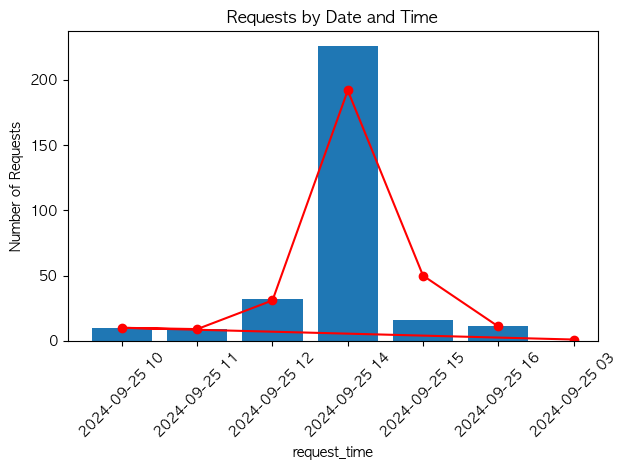

In [164]:
import matplotlib.pyplot as plt

plt.bar(df1['request_hour'], df1['num'])
plt.plot(df2['prediction_hour'], df2['num'], 'ro-')
plt.title('Requests by Date and Time')
plt.xlabel('request_time')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()

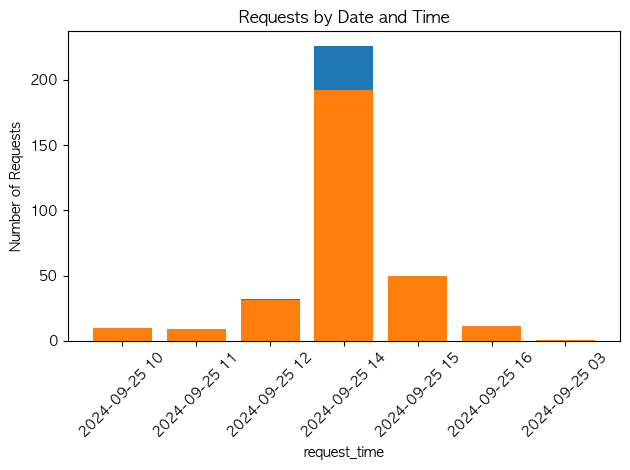

In [181]:
import matplotlib.pyplot as plt

plt.bar(df1['request_hour'], df1['num'])
plt.bar(df2['prediction_hour'], df2['num'])
plt.title('Requests by Date and Time')
plt.xlabel('request_time')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()

In [165]:
df2

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,request_hour,prediction_hour
prediction_hour,,,,,,,,,,,
2024-09-25 03,1,1,1,1,1,1,1,1,1,1,2024-09-25 03
2024-09-25 10,10,10,10,10,10,10,10,10,10,10,2024-09-25 10
2024-09-25 11,9,9,9,9,9,9,9,9,9,9,2024-09-25 11
2024-09-25 12,31,31,31,31,31,31,31,31,31,31,2024-09-25 12
2024-09-25 14,192,192,192,192,192,192,192,192,192,192,2024-09-25 14
2024-09-25 15,50,50,50,50,50,50,50,50,50,50,2024-09-25 15
2024-09-25 16,11,11,11,11,11,11,11,11,11,11,2024-09-25 16


In [166]:
df1

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,prediction_hour,request_hour
request_hour,,,,,,,,,,,
2024-09-25 10,10,10,10,10,10,10,10,10,10,10,2024-09-25 10
2024-09-25 11,9,9,9,9,9,9,9,9,9,9,2024-09-25 11
2024-09-25 12,32,32,32,32,32,32,32,32,32,32,2024-09-25 12
2024-09-25 14,226,226,226,226,226,226,226,226,226,226,2024-09-25 14
2024-09-25 15,16,16,16,16,16,16,16,16,16,16,2024-09-25 15
2024-09-25 16,11,11,11,11,11,11,11,11,11,11,2024-09-25 16


In [167]:
df['request_day'] = df['request_time'].dt.strftime('%Y-%m-%d')
df['request_h'] = df['request_time'].dt.hour
df['request_minute'] = df['request_time'].dt.minute

In [168]:
df['predict_day'] = df['prediction_time'].dt.strftime('%Y-%m-%d')
df['predict_h'] = df['prediction_time'].dt.hour
df['predict_minute'] = df['prediction_time'].dt.minute

In [169]:
df['hour_difference'] = df['predict_h'] - df['request_h'] 
df['minute_difference'] = df['predict_minute'] - df['request_minute'] 

In [170]:
df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,request_hour,prediction_hour,request_day,request_h,request_minute,predict_day,predict_h,predict_minute,hour_difference,minute_difference
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01,2024-09-25 10,2024-09-25 10,2024-09-25,10,30,2024-09-25,10,31,0,1
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01,2024-09-25 10,2024-09-25 10,2024-09-25,10,30,2024-09-25,10,31,0,1
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02,2024-09-25 10,2024-09-25 10,2024-09-25,10,30,2024-09-25,10,31,0,1
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02,2024-09-25 10,2024-09-25 10,2024-09-25,10,30,2024-09-25,10,31,0,1
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05,2024-09-25 10,2024-09-25 10,2024-09-25,10,30,2024-09-25,10,31,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,303,1.jpeg,1,/home/ubuntu/images/n23/635c0ffe-838b-4d77-927...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:47,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,57,0,1
300,304,1.jpeg,1,/home/ubuntu/images/n23/a1a38ed5-6e5c-45cd-958...,2024-09-25 16:56:41,n23,mnist240924.keras,1,2024-09-25 16:57:54,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,57,0,1
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,58,0,2
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,58,0,2


In [171]:
filtered_df = df[(df['minute_difference'] > 1) | (df['hour_difference'] < 0) | (df['hour_difference'] > 0) | (df['minute_difference'] < 1)]

In [172]:
filtered_df

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time,request_hour,prediction_hour,request_day,request_h,request_minute,predict_day,predict_h,predict_minute,hour_difference,minute_difference
5,6,001.png,,/home/ubuntu/images/n08/6b3e0607-4b7c-4603-a9d...,2024-09-25 10:35:11,n08,mnist240924.keras,0,2024-09-25 10:35:25,2024-09-25 10,2024-09-25 10,2024-09-25,10,35,2024-09-25,10,35,0,0
10,14,test_1.png,,/home/ubuntu/images/n06/8308410a-c62a-46f1-af1...,2024-09-25 11:53:00,n06,n01,9,2024-09-25 11:53:02,2024-09-25 11,2024-09-25 11,2024-09-25,11,53,2024-09-25,11,53,0,0
11,15,test_1.png,,/home/ubuntu/images/n06/42740b0b-d4ae-49b6-a8d...,2024-09-25 11:53:01,n06,n04,7,2024-09-25 11:53:02,2024-09-25 11,2024-09-25 11,2024-09-25,11,53,2024-09-25,11,53,0,0
12,16,test_1.png,,/home/ubuntu/images/n06/1d26a496-ec3e-4b0d-96b...,2024-09-25 11:53:01,n06,randint,0,2024-09-25 11:53:02,2024-09-25 11,2024-09-25 11,2024-09-25,11,53,2024-09-25,11,53,0,0
26,30,01.png,0,/home/ubuntu/images/n05/8939a107-9ab7-4e33-98b...,2024-09-25 12:15:47,n05,n77,2,2024-09-25 12:17:01,2024-09-25 12,2024-09-25 12,2024-09-25,12,15,2024-09-25,12,17,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,295,3.jpg,3,/home/ubuntu/images/n04/50a2c3cd-fca7-4e63-948...,2024-09-25 15:56:44,n04,n04,3,2024-09-25 15:58:16,2024-09-25 15,2024-09-25 15,2024-09-25,15,56,2024-09-25,15,58,0,2
292,296,9.png,9,/home/ubuntu/images/n07/fbc02423-ee3b-4f2a-a89...,2024-09-25 15:59:47,n07,n07,9,2024-09-25 15:59:57,2024-09-25 15,2024-09-25 15,2024-09-25,15,59,2024-09-25,15,59,0,0
301,305,1.jpeg,1,/home/ubuntu/images/n23/c5833f20-363b-470e-904...,2024-09-25 16:56:41,n23,randint,5,2024-09-25 16:58:02,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,58,0,2
302,306,1.jpeg,1,/home/ubuntu/images/n23/7430e34c-ed14-4b0b-8c7...,2024-09-25 16:56:41,n23,n04,1,2024-09-25 16:58:29,2024-09-25 16,2024-09-25 16,2024-09-25,16,56,2024-09-25,16,58,0,2


In [177]:
df3 = filtered_df.groupby(filtered_df['request_user']).count()
df3['request_user'] = df3.index

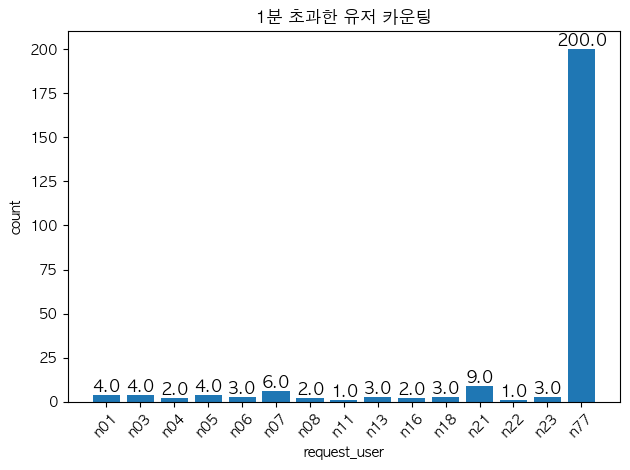

In [178]:
plt.bar(df3['request_user'].index, df3['minute_difference'], color='blue')
bar = plt.bar(df3['request_user'].index, df3['minute_difference'])
plt.rc('font', family='AppleGothic')
#plt.plot(df2['prediction_hour'], df2['num'], 'ro-')
# 값 넣는 부분
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.title('1분 초과한 유저 카운팅')
plt.xlabel('request_user')
plt.ylabel('count')
plt.xticks(rotation=45,fontsize=10)
plt.tight_layout()
plt.show()